In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_niblack, threshold_sauvola
import os
import imageio   

%matplotlib inline


In [23]:
base_path = r"archive (1)/DRIVE/training"

image_path = os.path.join(base_path, "images")
gt_path = os.path.join(base_path, "1st_manual")
mask_path = os.path.join(base_path, "mask")

print("Images exist:", os.path.exists(image_path))
print("GT exist:", os.path.exists(gt_path))


Images exist: True
GT exist: True


In [24]:
def sensitivity(pred, gt):
    TP = np.sum((pred == 1) & (gt == 1))
    FN = np.sum((pred == 0) & (gt == 1))
    return TP / (TP + FN + 1e-6)


Image: 21_training.tif
GT: 21_manual1.gif


C:\Users\prana\AppData\Local\Temp\ipykernel_11412\1536284692.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gt = imageio.imread(os.path.join(gt_path, gt_name))


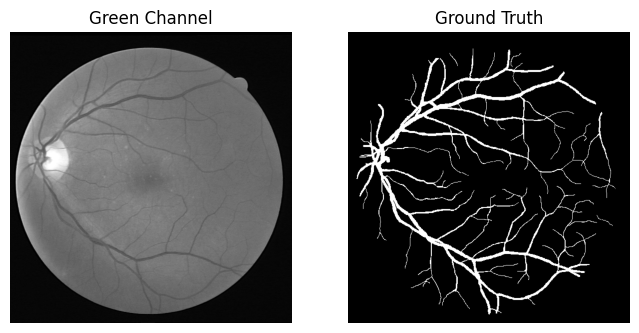

In [ ]:
image_list = sorted(os.listdir(image_path))

img_name = image_list[0]
print("Image:", img_name)

img_id = img_name.split("_")[0]
gt_name = img_id + "_manual1.gif"
print("GT:", gt_name)

img = cv2.imread(os.path.join(image_path, img_name))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
green = img[:, :, 1]

gt = imageio.imread(os.path.join(gt_path, gt_name))
gt_bin = gt > 0

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(green, cmap='gray')
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gt_bin, cmap='gray')
plt.title("Ground Truth")
plt.axis("off")

plt.show()


In [ ]:
window_size = 15

mask_name = img_id + "_training_mask.gif"
fov_mask = imageio.imread(os.path.join(mask_path, mask_name))
fov_bin = fov_mask > 0

niblack_thresh = threshold_niblack(green, window_size, k=-0.1)
niblack_bin = green < niblack_thresh

sauvola_thresh = threshold_sauvola(green, window_size, k=0.1)
sauvola_bin = green < sauvola_thresh

niblack_bin = niblack_bin & fov_bin
sauvola_bin = sauvola_bin & fov_bin


C:\Users\prana\AppData\Local\Temp\ipykernel_11412\1890065882.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  fov_mask = imageio.imread(os.path.join(mask_path, mask_name))


Sensitivity (Niblack): 0.8838916375665548
Sensitivity (Sauvola): 0.3488522994424182


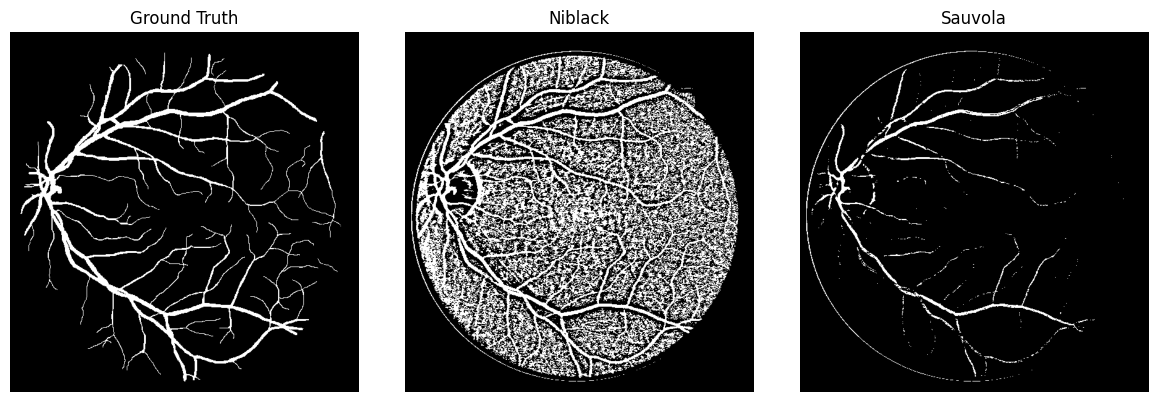

In [33]:
sens_n = sensitivity(niblack_bin, gt_bin)
sens_s = sensitivity(sauvola_bin, gt_bin)

print("Sensitivity (Niblack):", sens_n)
print("Sensitivity (Sauvola):", sens_s)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(gt_bin, cmap='gray')
plt.title("Ground Truth")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(niblack_bin, cmap='gray')
plt.title("Niblack")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(sauvola_bin, cmap='gray')
plt.title("Sauvola")
plt.axis("off")

plt.tight_layout()
plt.show()


In [34]:
sens_n_list = []
sens_s_list = []

for img_name in image_list:

    img_id = img_name.split("_")[0]
    gt_name = img_id + "_manual1.gif"
    mask_name = img_id + "_training_mask.gif"

    img = cv2.imread(os.path.join(image_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    green = img[:, :, 1]

    gt = imageio.imread(os.path.join(gt_path, gt_name))
    gt_bin = gt > 0

    fov_mask = imageio.imread(os.path.join(mask_path, mask_name))
    fov_bin = fov_mask > 0

    niblack_thresh = threshold_niblack(green, 15, k=-0.1)
    niblack_bin = green < niblack_thresh

    sauvola_thresh = threshold_sauvola(green, 15, k=0.1)
    sauvola_bin = green < sauvola_thresh

    niblack_bin = niblack_bin & fov_bin
    sauvola_bin = sauvola_bin & fov_bin

    sens_n_list.append(sensitivity(niblack_bin, gt_bin))
    sens_s_list.append(sensitivity(sauvola_bin, gt_bin))

print("Total processed images:", len(sens_n_list))


C:\Users\prana\AppData\Local\Temp\ipykernel_11412\2844599437.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gt = imageio.imread(os.path.join(gt_path, gt_name))
C:\Users\prana\AppData\Local\Temp\ipykernel_11412\2844599437.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  fov_mask = imageio.imread(os.path.join(mask_path, mask_name))


Total processed images: 20


Average Sensitivity (Niblack): 0.8710117976578685
Average Sensitivity (Sauvola): 0.40098685610802054


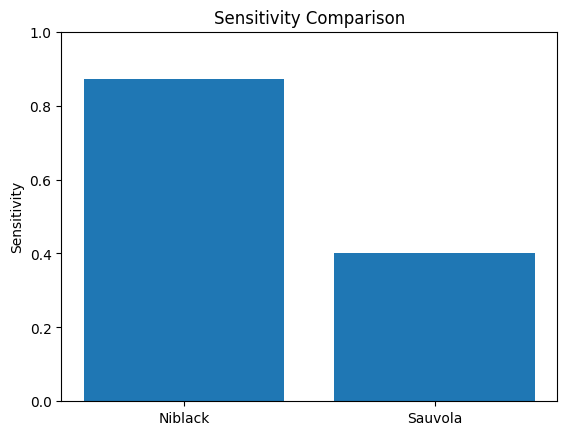

In [35]:
avg_niblack = np.mean(sens_n_list)
avg_sauvola = np.mean(sens_s_list)

print("Average Sensitivity (Niblack):", avg_niblack)
print("Average Sensitivity (Sauvola):", avg_sauvola)

methods = ["Niblack", "Sauvola"]
values = [avg_niblack, avg_sauvola]

plt.bar(methods, values)
plt.title("Sensitivity Comparison")
plt.ylabel("Sensitivity")
plt.ylim(0,1)
plt.show()
